# Double 7's (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
#start = datetime.datetime(2015, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Run Strategy

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 2.0,
    'period' : 7,
    'sma' : 70,
    'use_regime_filter' : True
}

s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [5]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
291,2020-12-11,366.30,2020-12-16,370.17,3.87,12267.98,3170,583008.15,LONG,SPY
292,2021-01-15,375.70,2021-01-20,383.89,8.19,25847.65,3156,608855.80,LONG,SPY
293,2021-01-27,374.41,2021-02-04,386.19,11.78,38932.90,3305,647788.69,LONG,SPY
294,2021-02-19,390.03,2021-03-10,389.58,-0.45,-1517.89,3373,646270.80,LONG,SPY
295,2021-03-19,389.48,2021-03-26,395.98,6.50,21898.50,3369,668169.30,LONG,SPY


In [6]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-25,659875.55,637471.73,657011.99,3369,-655887.35,2.00,-
2021-03-26,678169.30,678169.30,678169.30,0,678169.30,1.00,X
2021-03-29,678169.30,678169.30,678169.30,0,678169.30,1.00,-
2021-03-30,678169.30,678169.30,678169.30,0,678169.30,1.00,-
2021-03-31,678169.30,678169.30,678169.30,0,678169.30,1.00,-


Generate strategy stats - display all available stats

In [7]:
pf.print_full(s.stats)

start                                                   1993-11-11
end                                                     2021-03-31
beginning_balance                                            10000
ending_balance                                           678169.30
total_net_profit                                         668169.30
gross_profit                                            1308778.91
gross_loss                                              -640609.61
profit_factor                                                 2.04
return_on_initial_capital                                  6681.69
annual_return_rate                                           16.65
trading_period                           27 years 4 months 20 days
pct_time_in_market                                           32.36
margin                                                        2.00
avg_leverage                                                  1.33
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [8]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

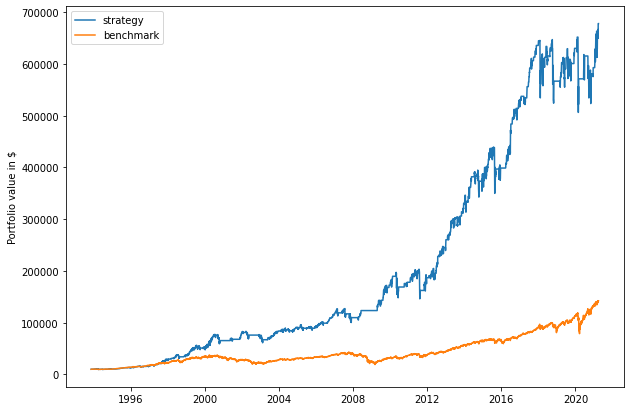

In [9]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

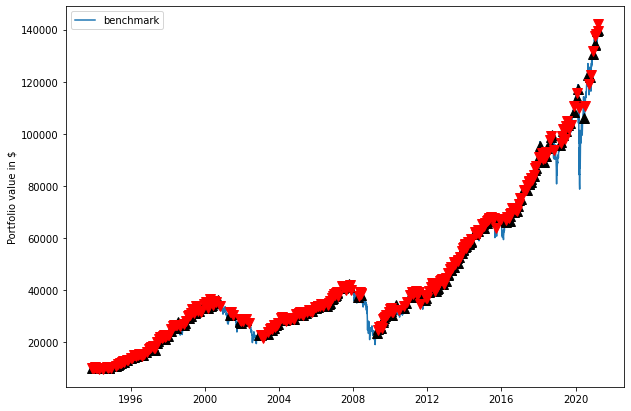

In [10]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,16.65,10.18
max_closed_out_drawdown,-28.09,-55.17
annualized_return_over_max_drawdown,0.59,0.18
best_month,28.01,23.60
worst_month,-27.26,-30.98
sharpe_ratio,0.83,0.60
sortino_ratio,0.65,0.77
monthly_std,4.53,4.52
annual_std,19.43,16.93


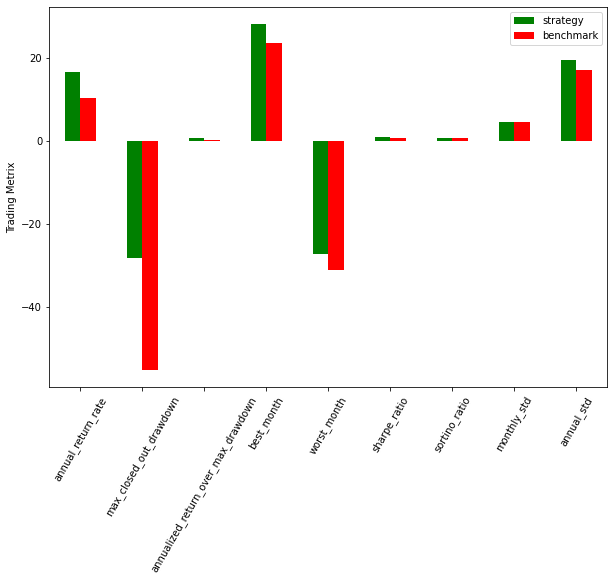

In [11]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.15
median,0.13,0.13
min,0.03,0.00
max,0.96,0.78
std,0.11,0.14
last,0.14,0.25


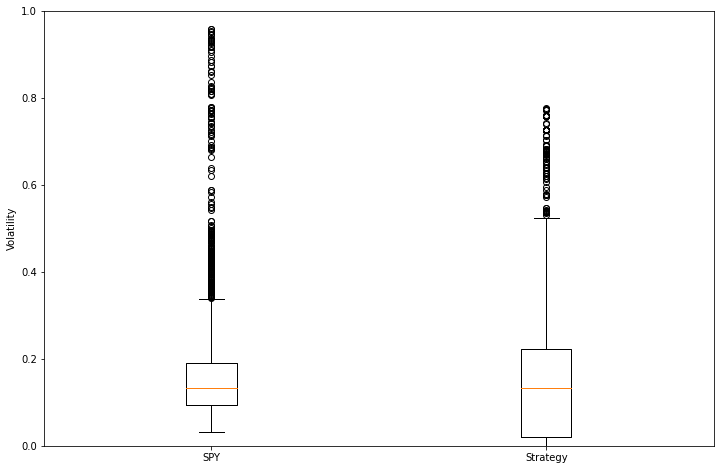

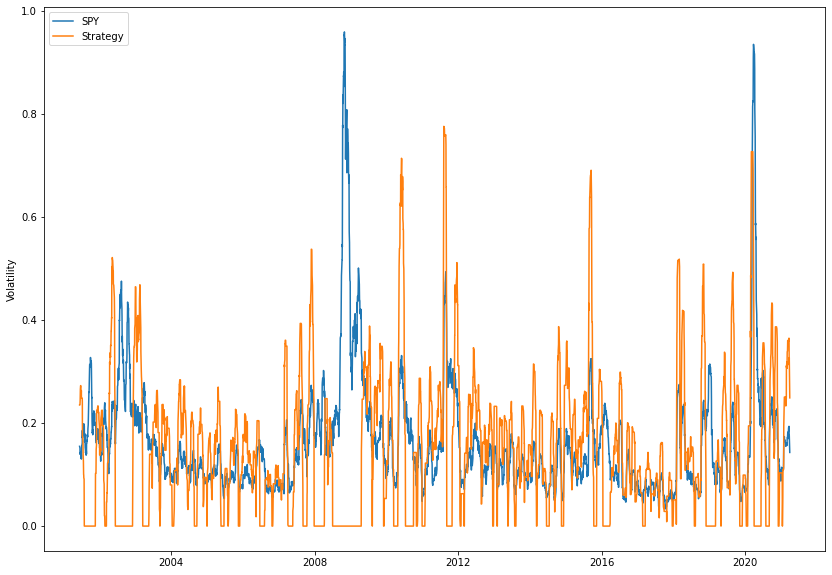

In [12]:
df = pf.volatility_graphs([s.ts, s.dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

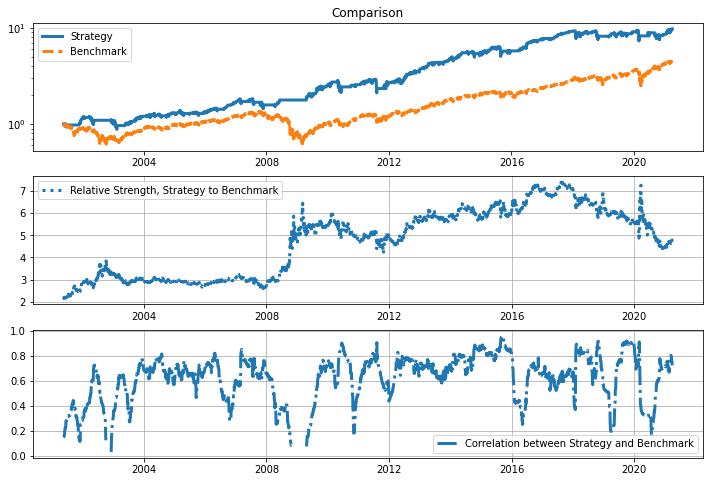

In [13]:
returns = s.dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)

In [14]:
pf.kelly_criterian(s.stats, benchmark.stats)

sharpe_ratio            0.83
sharpe_ratio_max        0.87
sharpe_ratio_min        0.79
strategy risk           0.19
instrument risk         0.17
optimal target risk     0.83
half kelly criterian    0.41
aggressive leverage     4.89
moderate leverage       2.45
conservative leverage   2.32
dtype: float64